In [1]:
import numpy as np
import pandas as pd
!pip install tables
import h5py

# Good Data

## ATLN Data

In [8]:
data_path = r"C:\Users\kdarn\OneDrive\Documents\Life's Portfolio\Projects\Machine Learning Personal Projects\Cyclone Imaging\TCIR-ATLN_EPAC_WPAC.h5\TCIR-ATLN_EPAC_WPAC.h5"
# load "info" as pandas dataframe
data_info = pd.read_hdf(data_path, key="info", mode='r')

# load "matrix" as numpy ndarray, this could take longer times
with h5py.File(data_path, 'r') as hf:
    atln_data_matrix = hf['matrix'][:]

In [9]:
atln_data_matrix.shape

(47381, 201, 201, 4)

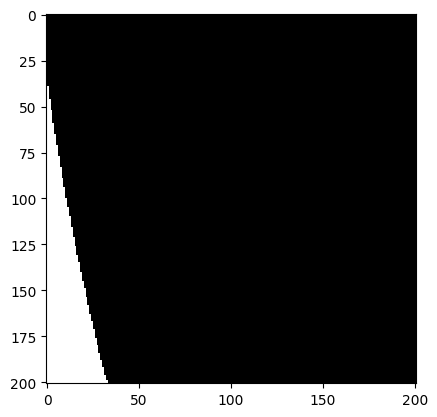

In [4]:
import matplotlib.pyplot as plt
"""
cmap = plt.cm.gray
norm = plt.Normalize(data_matrix.min(), data_matrix.max())
rgba = cmap(norm(data_matrix))
"""
plt.imshow(atln_data_matrix[2, :, :, 2], cmap = "binary_r")

In [5]:
#cyclone_images = np.stack([atln_data_matrix[:,:,:,0], atln_data_matrix[:,:,:,1], atln_data_matrix[:,:,:,3]], axis = -1)

In [6]:
data_info

,data_set,ID,lon,lat,time,Vmax,R35_4qAVG,MSLP
0,ATLN,200301L,-66.2,29.1,2003041800,30.0,0.0,1008.0
1,ATLN,200301L,-66.1,29.5,2003041803,30.0,0.0,1008.0
2,ATLN,200301L,-66.0,29.9,2003041806,30.0,0.0,1008.0
3,ATLN,200301L,-65.9,30.4,2003041809,30.0,0.0,1008.0
4,ATLN,200301L,-65.8,30.8,2003041812,30.0,0.0,1008.0
...,...,...,...,...,...,...,...,...
47376,WPAC,201630W,114.6,13.6,2016122718,30.0,0.0,1004.0
47377,WPAC,201630W,113.9,13.2,2016122721,28.0,0.0,1006.0
47378,WPAC,201630W,113.3,12.9,2016122800,25.0,0.0,1007.0
47379,WPAC,201630W,112.8,12.4,2016122803,23.0,0.0,1007.0


## CPAC Data

In [7]:
data_path = "TCIR-CPAC_IO_SH.h5.tar\TCIR-CPAC_IO_SH.h5\TCIR-CPAC_IO_SH.h5"

# load "info" as pandas dataframe
data_info = pd.read_hdf(data_path, key="info", mode='r')

# load "matrix" as numpy ndarray, this could take longer times
with h5py.File(data_path, 'r') as hf:
    cpac_data_matrix = hf['matrix'][:]

In [8]:
cpac_data_matrix.shape

(23118, 201, 201, 4)

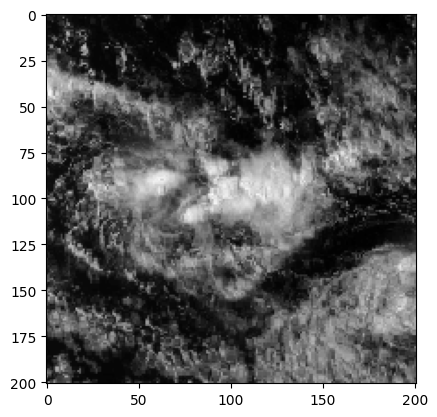

In [9]:
import matplotlib.pyplot as plt
"""
cmap = plt.cm.gray
norm = plt.Normalize(data_matrix.min(), data_matrix.max())
rgba = cmap(norm(data_matrix))
"""
plt.imshow(cpac_data_matrix[0,:,:,2], cmap = "binary_r")

# Data Cleaning

In [10]:
atln_mask = np.isnan(atln_data_matrix[:,:,:,2]).any(axis = (1,2))
cpac_mask = np.isnan(cpac_data_matrix[:,:,:,2]).any(axis = (1,2))

In [11]:
atln_cleaned_data = atln_data_matrix[~atln_mask]
cpac_cleaned_data = cpac_data_matrix[~cpac_mask]

In [27]:
atln_mask

array([False,  True,  True, ..., False, False, False])

In [43]:
atln_cleaned_data[:,:,:,2].shape

(19236, 201, 201)

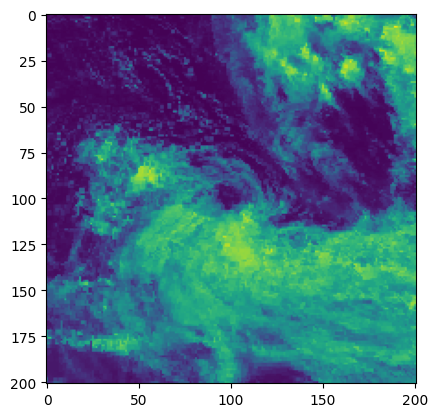

In [25]:
plt.imshow(atln_cleaned_data[3,:,:,2])

In [32]:
tol = 1e-3
Mapping = lambda x: np.all(np.where(np.abs(x) <= tol, 0, x) == 0)
atln_zero_Mask = np.array([Mapping(x) for x in atln_cleaned_data[:, :, :, 2]])
atln_zero_Mask.shape
atln_data = atln_cleaned_data[~atln_zero_Mask]

Mapping = lambda x: np.all(np.where(np.abs(x) <= tol, 0, x) == 0)
cpac_zero_Mask = np.array([Mapping(x) for x in cpac_cleaned_data[:, :, :, 2]])
cpac_zero_Mask.shape
cpac_data = cpac_cleaned_data[~cpac_zero_Mask]

In [38]:
atln_data.shape


(16962, 201, 201, 4)

In [39]:
cpac_data.shape

(12504, 201, 201, 4)

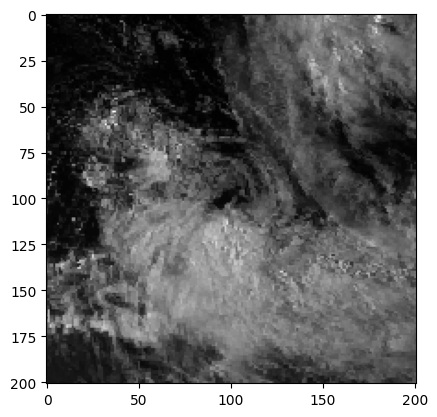

In [33]:
plt.imshow(atln_data[2, :, :, 2], cmap = "binary_r")

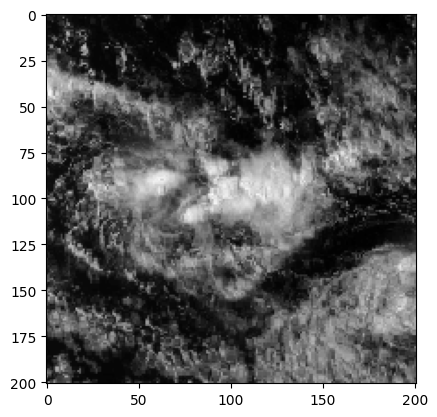

In [34]:
plt.imshow(cpac_cleaned_data[0, :, :, 2], cmap = "binary_r")

# Concatenantion

In [41]:
#train = [atln_cleaned_data[:, :, :, 2], cpac_cleaned_data[0, :, :, 2]]
train = np.concatenate([atln_data[:, :, :, 2], cpac_data[:, :, :, 2]], axis = 0)
print(train.shape)
np.save('train.npy', train)

In [42]:
print(train.shape)

(29466, 201, 201)
